
*   RoBERTa(Robustly Optimized BERT-Pretraining Approach)
*   BERT(Bidirectional Encoder Representations from Transformers)

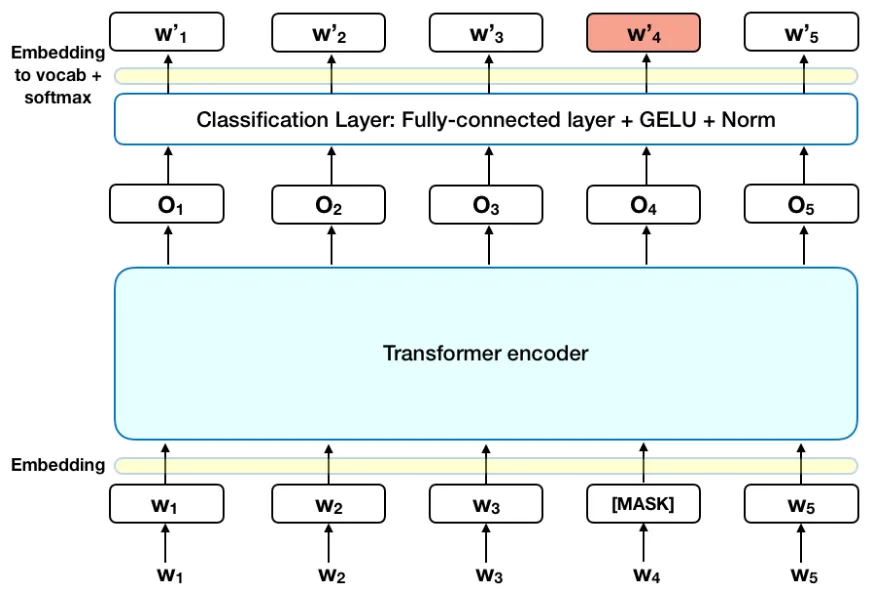

Demo Source: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

In [ ]:
# Transformers is managed by HuggingFace, and is needed when using HuggingFace hosted models
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
from scipy.special import softmax

In [ ]:
# most transformer-based language models come with their own tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
tokenizer

RobertaTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-sentiment', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}
)

**Labels**:

*   0 -> Negative
*   1 -> Neutral
*   2 -> Positive



In [ ]:
# let's try multiple sentences
text = "This is an example of a happy tweet!"
# text = "'This is an example of a happy 😁 👍 ❤️ tweet!"
# text = '😁 👍 ❤️'

# tokenize text
encoded_input = tokenizer(text, return_tensors='pt')
encoded_input

{'input_ids': tensor([[   0,  713,   16,   41, 1246,    9,   10, 1372, 3545,  328,    2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
output = model(**encoded_input)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.7923, -0.1941,  3.5851]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.00165876, 0.02229328, 0.97604793], dtype=float32)

In [ ]:
# Multilingual BERT
# https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
text = "I am so happy to attend this class!"
# text = "저는 이 수업에 참석하게 되어 정말 기쁩니다!"
# text = "Sono così felice di partecipare a questa lezione!"
# text = "我很高兴参加这门课！"
# text = "Я так счастлив присутствовать на этом занятии!"
# text = "¡Estoy muy feliz de asistir a esta clase!"
# text = "मैं इस कक्षा में शामिल होकर बहुत खुश हूँ!"

encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.00156252, 0.00113362, 0.01028794, 0.14229861, 0.8447173 ],
      dtype=float32)

### Compare RoBERTa and TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
# Wrapper for this specific roberta sentiment model:

LABELS = {0:'Negative', 1:'Neutral', 2:'Positive'}

def roberta_sentiment(text):
  print(f'Content: {text}')
  encoded_input = tokenizer(text, return_tensors='pt')
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  for i in LABELS:
    print(f'{LABELS[i]}: {scores[i]}')
  return scores

In [ ]:
text1 = 'The food was amazing'
text2 = 'The food was AMAZING'
for txt in (text1, text2):
  roberta_sentiment(txt)
  print('-----')

Content: The food was amazing
Negative: 0.00884515605866909
Neutral: 0.010233857668936253
Positive: 0.04670229181647301
-----
Content: The food was AMAZING
Negative: 0.00884515605866909
Neutral: 0.010233857668936253
Positive: 0.04670229181647301
-----


In [ ]:
for txt in (text1, text2):
  blob = TextBlob(text)
  print(blob.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=1.0, subjectivity=1.0)


#### Let's test more on different sentences!

In [ ]:
# on restaurant reviews
text = 'we received our food in under ten minutes.' # Original sentence: The server was really helpful and we received our food in under ten minutes.

In [ ]:
text = 'And service was definitely 5 star'

In [ ]:
text = 'this is not too bad'

In [ ]:
text = "Whenever I'm back in town and in the mood for some dumplings, this place is my go-to."

In [ ]:
text = 'Huge portions for a great price, but the service was slow, painfully so'

In [ ]:
roberta_sentiment(text)

Content: Huge portions for a great price, but the service was slow, painfully so
Negative: 0.08341288566589355
Neutral: 0.42014071345329285
Positive: 0.43501967191696167


In [ ]:
blob = TextBlob(text)
print(blob.sentiment.polarity)

0.04999999999999999


# On Your Own
1. Search for a model in huggingface.co
2. Get any 10 sentences from your own data
3. Compare the results of TextBlob, VADER, Twitter-roberta-base-sentiment, and the model of your choice.